In [65]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

ImportError: No module named 'sklearn'

In [49]:
# the four different states of the XOR gate
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=500, verbose=0)

print(model.predict(training_data))
print(model.predict(training_data).round())

[[ 0.34082469]
 [ 0.74573612]
 [ 0.76194018]
 [ 0.23704146]]
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


In [59]:
covar = [[0.03, 0],[0, 0.03]]

a = np.random.multivariate_normal([0,0],covar,100)
b = np.random.multivariate_normal([0,1],covar,100)
c = np.random.multivariate_normal([1,0],covar,100)
d = np.random.multivariate_normal([1,1],covar,100)

noisy_training_data = np.concatenate((a, b, c, d), axis=0)
noisy_target_data = np.concatenate((np.zeros(100), np.ones(100), np.ones(100), np.zeros(100)))

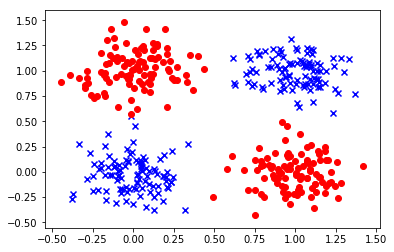

In [60]:
x, y = zip(*a)
plt.scatter(x, y, color='b', marker='x')

x, y = zip(*b)
plt.scatter(x, y, color='r', marker='o')

x, y = zip(*c)
plt.scatter(x, y, color='r', marker='o')

x, y = zip(*d)
plt.scatter(x, y, color='b', marker='x')
plt.show()

In [64]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


NameError: name 'StratifiedKFold' is not defined